In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv(r'C:\Users\ahmad\Downloads\House Pricing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
##Discretize age into three bins
bin_edges = [0, 30, 60, df['age'].max()]
bin_labels = ['Young', 'Middle-aged', 'Old']
#create new col
df['age_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels)
#save data
df.to_csv("House Pricing.csv", index=False)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,age_category
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,Old
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,Old
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,Old
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,Middle-aged
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,Middle-aged


In [8]:
#create binary col
df['is_charles_river'] = (df['chas'] == 1).astype(int)
df.to_csv("House Pricing.csv", index=False)
df.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,age_category,is_charles_river
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0,Old,0


In [10]:
#Handle outliers
def detect_and_remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers
##Specify cols
columns_to_check = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
outliers_dict = {}
##For each col in csv
for column_name in columns_to_check:
    outliers = detect_and_remove_outliers(df[column_name])
    outliers_dict[column_name] = outliers
##Print outliers
for column_name, outliers in outliers_dict.items():
    if not outliers.empty:
        print(f"Outliers in '{column_name}':")
        print(outliers)
 
##Remove outliers
for column_name, outliers in outliers_dict.items():
    df = df[~df[column_name].isin(outliers)]
    
##Create mask to filter outlier rows    
outlier_mask = pd.Series(False, index=df.index)
for column_name, outliers in outliers_dict.items():
    outlier_mask = outlier_mask | df.index.isin(outliers.index)

# Use .loc to filter and update the DataFrame
df = df.loc[~outlier_mask]
    


Outliers in 'zn':
39     75.0
40     75.0
54     75.0
55     90.0
56     85.0
       ... 
351    60.0
352    60.0
353    90.0
354    80.0
355    80.0
Name: zn, Length: 68, dtype: float64
Outliers in 'chas':
142    1
152    1
154    1
155    1
160    1
162    1
163    1
208    1
209    1
210    1
211    1
212    1
216    1
218    1
219    1
220    1
221    1
222    1
234    1
236    1
269    1
273    1
274    1
276    1
277    1
282    1
283    1
356    1
357    1
358    1
363    1
364    1
369    1
370    1
372    1
Name: chas, dtype: int64
Outliers in 'rm':
97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
180    7.765
186    7.831
195    7.875
203    7.853
204    8.034
224    8.266
225    8.725
226    8.040
232    8.337
233    8.247
253    8.259
257    8.704
262    8.398
267    8.297
280    7.820
283    7.923
364    8.780
365    3.561
367    3.863
374    4.138
384    4.368
386    4.652
406    4.138
412    4.628
414    4.519
Name: rm, dtype: float64
Outliers in 'dis':
3

In [14]:
##remove noisy datapoints
noisy_data_mask = df.isnull().any(axis=1)
df = df[~(outlier_mask | noisy_data_mask)]
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,is_charles_river
count,295.000000,295.000000,295.000000,295.0,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.0
mean,2.517372,3.581356,11.345390,0.0,0.547495,6.157576,68.643729,3.809026,8.566102,390.033898,18.930508,389.039254,12.785119,20.594576,0.0
std,6.782543,8.356644,6.417859,0.0,0.102697,0.444397,26.910764,1.807645,8.090151,159.961301,1.716532,11.257958,5.911537,5.282229,0.0
min,0.006320,0.000000,1.380000,0.0,0.409000,4.880000,2.900000,1.316300,1.000000,188.000000,14.700000,344.910000,2.940000,5.600000,0.0
25%,0.092755,0.000000,5.960000,0.0,0.462000,5.882500,48.250000,2.354300,4.000000,281.000000,17.900000,386.670000,8.230000,17.750000,0.0
50%,0.206080,0.000000,9.690000,0.0,0.524000,6.137000,74.300000,3.424200,5.000000,307.000000,19.200000,393.680000,11.970000,20.600000,0.0
75%,1.297315,0.000000,18.100000,0.0,0.595000,6.419000,93.450000,5.157500,8.000000,437.000000,20.200000,396.900000,16.395000,23.400000,0.0
max,88.976200,30.000000,27.740000,0.0,0.871000,7.416000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,36.200000,0.0


In [16]:
##Smoothing using exp moving avg
alpha = 0.2 #b/w 0-1
df['smoothed_rm'] = df['rm'].ewm(alpha=alpha, adjust=False).mean()


In [17]:
## Min-Max normalization of 'tax' col
min_tax = df['tax'].min()
max_tax = df['tax'].max()
df['normalized_tax'] = (df['tax'] - min_tax) / (max_tax - min_tax)

## Min-Max normalization of  'Istat' col
min_lstat = df['lstat'].min()
max_lstat = df['lstat'].max()
df['normalized_lstat'] = (df['lstat'] - min_lstat) / (max_lstat - min_lstat)



In [19]:
##Simple linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [21]:
X = df[['rm']]  # Feature: 'rm' (average number of rooms per dwelling)
Y = df['medv']  #'medv' (median value of owner-occupied homes)


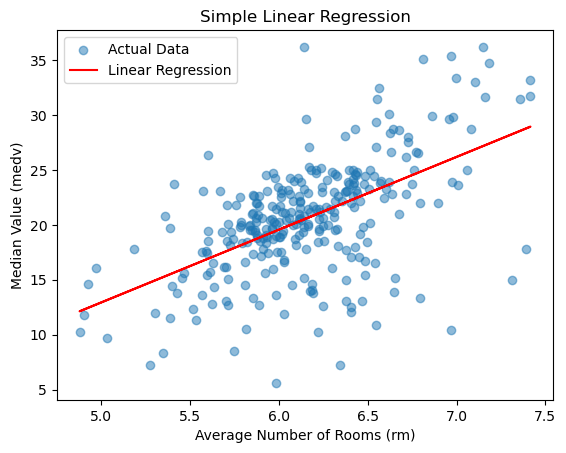

Intercept (b0): -20.24376360024219
Slope (b1): 6.632210154265763
Regression Equation: medv = -20.24 + 6.63 * rm


In [24]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the original data points and the regression line
plt.scatter(X, y, label='Actual Data', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('Average Number of Rooms (rm)')
plt.ylabel('Median Value (medv)')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()

# Print the model coefficients
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept (b0): {intercept}")
print(f"Slope (b1): {slope}")

# Print the regression equation
print(f"Regression Equation: medv = {intercept:.2f} + {slope:.2f} * rm")


In [25]:
##From the above Regression equation it shows that with the increase of rooms per dwelling the median value of homes 
##also increases Hence it is a positive Linear Relationship
##slope represent the increase of house value when the number of room increase